In [1]:
import numpy as np 
import scipy 

import matplotlib.pyplot as plt

scipy.signal.chirp

In [2]:
# Sampling params
fs = 125000
nf = 0.5*fs
dt = 1/(nf*2)

print('Nyquist frequency: %.2f'%nf)
print('Sample Rate (s) : %.2e'%dt)
print('Nyquist period:  %.2e'%(1/nf))

Nyquist frequency: 62500.00
Sample Rate (s) : 8.00e-06
Nyquist period:  1.60e-05


In [3]:
# Distance Calcs
vel = 250 # sand velocity m/s
dist = 0.175 #17.5cm from source to box edge
t = dist/vel

print('Sec traveltime: %.2e'%t)
print('Millisec traveltime: ', t*1000)

Sec traveltime: 7.00e-04
Millisec traveltime:  0.7


In [12]:
# Chirp Params

nt = 5000 # time steps
t_axis = np.arange(0,nt*dt,dt)
# print(t_axis)

f0 = 5000
f1 = 20000
t1 = t_axis[-1]

Text(0, 0.5, 'amp')

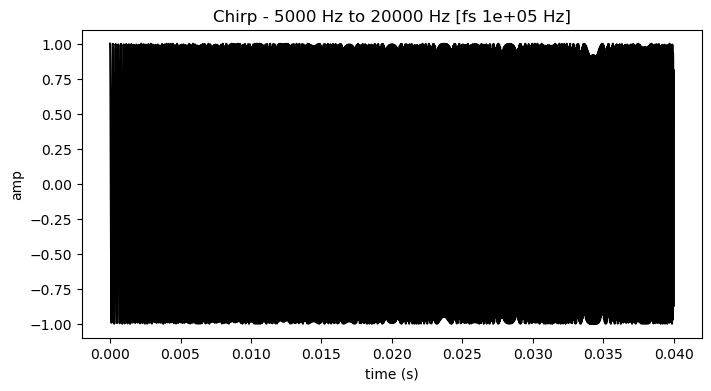

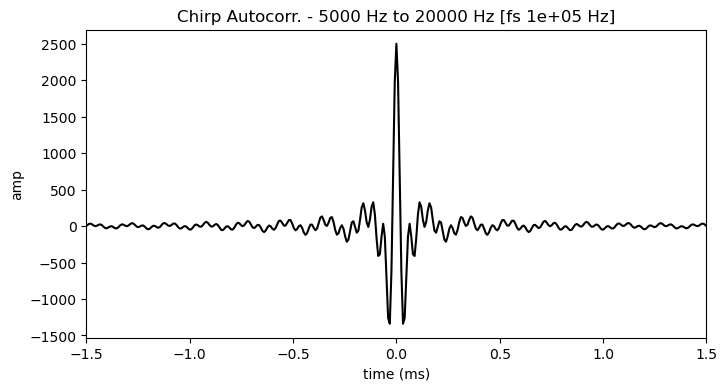

In [13]:
chirp = scipy.signal.chirp(t_axis,f0,t1,f1)
# print(chirp)

plt.figure(figsize=[8,4])
plt.plot(t_axis, chirp,'k')
plt.xlabel('time (s)')
plt.ylabel('amp')
plt.title('Chirp - %i Hz to %i Hz [fs %.0e Hz]'%(f0,f1,(nf*2)))

autocorr = scipy.signal.correlate(chirp,chirp)

plt.figure(figsize=[8,4])
plt.plot(1000*np.hstack([-1*np.flipud(t_axis[1:]),t_axis]),autocorr,'k')
plt.xlim([-1.5,1.5])
plt.title('Chirp Autocorr. - %i Hz to %i Hz [fs %.0e Hz]'%(f0,f1,(nf*2)))
plt.xlabel('time (ms)')
plt.ylabel('amp')